# Scott Breitbach
### DSC530: Final Project
### 14-November-2020

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import matplotlib
# import matplotlib.pyplot as plt
import thinkplot

## Data Cleaning

In [2]:
# Read data file to dataframe
# Data set pulled from: https://gssdataexplorer.norc.org/
gss = r'GSS.xlsx'
df = pd.read_excel(gss)

# Fix weird spacing of year column
df = df.rename(columns={'Gss year for this respondent                       ':'Gss year for this respondent'})

In [3]:
origColumns = df.columns.tolist()
origColumns

['Gss year for this respondent',
 'Respondents income (86)',
 'Respondents income',
 'Total family income',
 'Number of persons in household',
 'How many grandparents born outside u.s.',
 'Age of respondent',
 'Travel time to work',
 'Number of hours worked last week',
 'Respondent id number',
 'Rs occupational prestige score (2010)']

In [4]:
# Rename column headers
df = df.rename(columns={'Gss year for this respondent':'year',
 'Respondents income (86)':'rincome86',
 'Respondents income':'rincome',
 'Total family income':'income',
 'Number of persons in household':'hompop',
 'How many grandparents born outside u.s.':'granborn',
 'Age of respondent':'age',
 'Travel time to work':'commute',
 'Number of hours worked last week':'hrs1',
 'Respondent id number':'id',
 'Rs occupational prestige score (2010)':'prestg10'})

In [5]:
newColumns = df.columns.tolist()
newColumns

['year',
 'rincome86',
 'rincome',
 'income',
 'hompop',
 'granborn',
 'age',
 'commute',
 'hrs1',
 'id',
 'prestg10']

Note: rincome is and adjusted value available for all years of the survey; rincome86 is for the years 1986-1990 and is not adjusted.

In [6]:
def CleanColumn(df, columnName):
    na_vals = ["Don't know", "No answer", "Not applicable", "Refused"]
    df[columnName].replace(na_vals, np.nan, inplace = True)
    return df

def CleanData(df):
    for item in newColumns:
        df = CleanColumn(df, item)
    
    # Create unique user IDs for each row:
    df['uniqueID'] = df['year'].map(str) + '-' + df['id'].map(str)
    
    # Replace age of '89 or older' with 89
    df['age'] = df['age'].replace(['89 or older'], 89)

    # Replace grandparents born 'All in u.s' with 0 (born outside U.S.)
    df['granborn'] = df['granborn'].replace(['All in u.s'], 0)

    # Replace travel time of '97+ minutes' with 97
    df['commute'] = df['commute'].replace(['97+ minutes'], 97)
    
    return df

In [7]:
df = CleanData(df)

In [8]:
display(df.dtypes)

year           int64
rincome86     object
rincome       object
income        object
hompop       float64
granborn     float64
age          float64
commute      float64
hrs1         float64
id             int64
prestg10       int64
uniqueID      object
dtype: object

In [9]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5


In [10]:
def FixIncVals(column):
    # Replace income ranges with average values in new column
    column = column.replace(['Lt $1000'], 500)
    column = column.replace(['$1000 to 2999'], 2000)
    column = column.replace(['$3000 to 3999'], 3500)
    column = column.replace(['$4000 to 4999'], 4500)
    column = column.replace(['$5000 to 5999'], 5500)
    column = column.replace(['$6000 to 6999'], 6500)
    column = column.replace(['$7000 to 7999'], 7500)
    column = column.replace(['$8000 to 9999'], 9000)
    column = column.replace(['$10000 - 14999'], 12500)
    column = column.replace(['$15000 - 19999'], 17500)
    column = column.replace(['$20000 - 24999'], 22500)
    column = column.replace(['$25000 or more'], 25000)
    return column

In [11]:
# Create new columns with usabale values:
df['rincome2'] = FixIncVals(df['rincome'])
df['income2'] = FixIncVals(df['income'])

In [12]:
# Display unique values in column
df.rincome86.unique()

array([nan, '$20000-22499', '$6000-6999', '$8000-9999', '$4000-4999',
       '$12500-14999', '$25000-29999', '$5000-5999', '$10000-12499',
       '$22500-24999', '$7000-7999', '$15000-17499', '$40000-49999',
       '$30000-34999', '$50000-59999', '$17500-19999', '$1000-2999',
       '$3000-3999', '$35000-39999', '$60000+', 'Lt $1000'], dtype=object)

In [13]:
def FixIncVals86(column):
    # Replace income ranges with average values in new column
    column = column.replace(['Lt $1000'], 500)
    column = column.replace(['$1000-2999'], 2000)
    column = column.replace(['$3000-3999'], 3500)
    column = column.replace(['$4000-4999'], 4500)
    column = column.replace(['$5000-5999'], 5500)
    column = column.replace(['$6000-6999'], 6500)
    column = column.replace(['$7000-7999'], 7500)
    column = column.replace(['$8000-9999'], 9000)
    column = column.replace(['$10000-12499'], 11250)
    column = column.replace(['$12500-14999'], 13750)
    column = column.replace(['$15000-17499'], 16250)
    column = column.replace(['$17500-19999'], 18750)
    column = column.replace(['$20000-22499'], 21250)
    column = column.replace(['$22500-24999'], 23750)
    column = column.replace(['$25000-29999'], 27500)
    column = column.replace(['$30000-34999'], 32500)
    column = column.replace(['$35000-39999'], 37500)
    column = column.replace(['$40000-49999'], 45000)
    column = column.replace(['$50000-59999'], 55000)
    column = column.replace(['$60000+'], 60000)

    return column

In [14]:
df['rincome86_2'] = FixIncVals86(df['rincome86'])

In [15]:
df.rincome86.unique()

array([nan, '$20000-22499', '$6000-6999', '$8000-9999', '$4000-4999',
       '$12500-14999', '$25000-29999', '$5000-5999', '$10000-12499',
       '$22500-24999', '$7000-7999', '$15000-17499', '$40000-49999',
       '$30000-34999', '$50000-59999', '$17500-19999', '$1000-2999',
       '$3000-3999', '$35000-39999', '$60000+', 'Lt $1000'], dtype=object)

In [16]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN


In [17]:
def IncomeBuckets(column):
    # Replace income ranges with equally spaced buckets, truncated down, by 5000s
    column = column.replace(['Lt $1000'], 0)
    column = column.replace(['$1000 to 2999'], 0)
    column = column.replace(['$3000 to 3999'], 0)
    column = column.replace(['$4000 to 4999'], 0)
    column = column.replace(['$5000 to 5999'], 5000)
    column = column.replace(['$6000 to 6999'], 5000)
    column = column.replace(['$7000 to 7999'], 5000)
    column = column.replace(['$8000 to 9999'], 5000)
    column = column.replace(['$10000 - 14999'], 10000)
    column = column.replace(['$15000 - 19999'], 15000)
    column = column.replace(['$20000 - 24999'], 20000)
    column = column.replace(['$25000 or more'], 25000)
    
    return column

In [18]:
df['rincome2b'] = IncomeBuckets(df['rincome'])

In [19]:
def IncomeBuckets86(column):
    # Replace income ranges with equally spaced buckets, truncated down, by 10000s
    column = column.replace(['Lt $1000'], 0)
    column = column.replace(['$1000-2999'], 0)
    column = column.replace(['$3000-3999'], 0)
    column = column.replace(['$4000-4999'], 0)
    column = column.replace(['$5000-5999'], 0)
    column = column.replace(['$6000-6999'], 0)
    column = column.replace(['$7000-7999'], 0)
    column = column.replace(['$8000-9999'], 0)
    column = column.replace(['$10000-12499'], 10000)
    column = column.replace(['$12500-14999'], 10000)
    column = column.replace(['$15000-17499'], 10000)
    column = column.replace(['$17500-19999'], 10000)
    column = column.replace(['$20000-22499'], 20000)
    column = column.replace(['$22500-24999'], 20000)
    column = column.replace(['$25000-29999'], 20000)
    column = column.replace(['$30000-34999'], 30000)
    column = column.replace(['$35000-39999'], 30000)
    column = column.replace(['$40000-49999'], 40000)
    column = column.replace(['$50000-59999'], 50000)
    column = column.replace(['$60000+'], 60000)
    
    return column

In [20]:
df['rincome86_2b'] = IncomeBuckets86(df['rincome86'])

In [21]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN,5000.0,NaN
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN,5000.0,NaN
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN,NaN,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN,5000.0,NaN


## Bulletpoints for PowerPoint
A minimum of 5 variables in your dataset used during your analysis (for help with  selecting, the author made his selection on page 6 of your book). Consider what you  think could have an impact on your question – remember this is never perfect, so don’t  be worried if you miss one (Chapter 1). 

### Histograms
Include a histogram of each of the 5 variables – in your summary and analysis, identify  any outliers and explain the reasoning for them being outliers and how you believe they  should be handled (Chapter 2).  

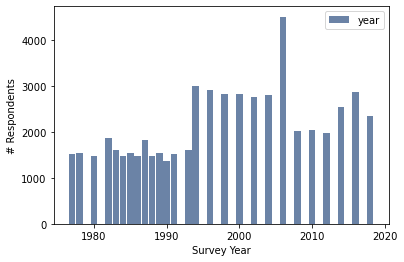

In [22]:
hist1 = thinkstats2.Hist(df.year, label='year')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Survey Year', ylabel='# Respondents')

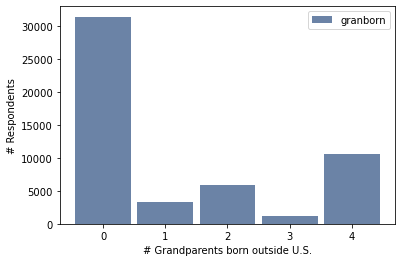

In [23]:
hist2 = thinkstats2.Hist(df.granborn, label='granborn')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='# Grandparents born outside U.S.', ylabel='# Respondents')

In [24]:
# Divide granborn into 2 groups: 
# Those born entirely in the US and those with at least 1 grandparent born outside US
granUS = df[df.granborn == 0]
granOut = df[df.granborn > 0]

granUS_hist = thinkstats2.Hist(granUS.rincome2, label='All US Grandparents')
granOut_hist = thinkstats2.Hist(granOut.rincome2, label='1 or more outside US')

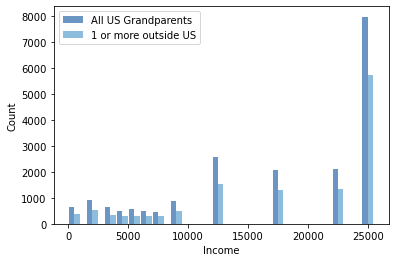

In [25]:
# Compare incomes of the 2 grandparent groups
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(granUS_hist, align='right', width=width)
thinkplot.Hist(granOut_hist, align='left', width=width)
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [26]:
# Check sizes of new groups
len(granUS), len(granOut)

(31367, 20944)

Note: US grandparents group is larger than the other group. Need to compare later in a PMF.

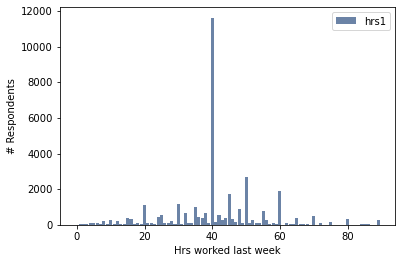

In [27]:
hist3 = thinkstats2.Hist(df.hrs1, label='hrs1')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Hrs worked last week', ylabel='# Respondents')

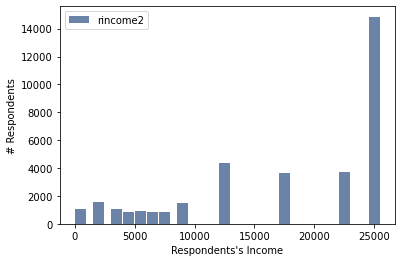

In [28]:
hist4 = thinkstats2.Hist(df.rincome2, label='rincome2')
thinkplot.Hist(hist4)
thinkplot.Config(xlabel="Respondents's Income", ylabel='# Respondents')

In [29]:
incMore20k = df[df.rincome2 >= 20000]
incLess20k = df[df.rincome2 <= 20000]

incMore_hist = thinkstats2.Hist(incMore20k.granborn, label='>$20k Income')
incLess_hist = thinkstats2.Hist(incLess20k.granborn, label='<$20k Income')

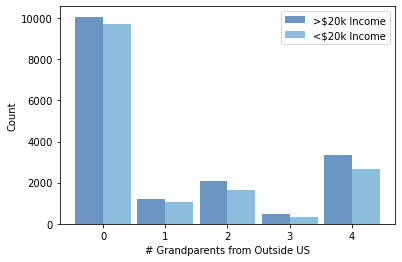

In [30]:
width = .45
thinkplot.PrePlot(2)
thinkplot.Hist(incMore_hist, align='right', width=width)
thinkplot.Hist(incLess_hist, align='left', width=width)
thinkplot.Config(xlabel='# Grandparents from Outside US', ylabel='Count')#, xlim=[0, 25000])

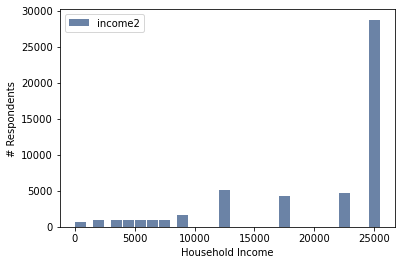

In [31]:
# Individual income
hist4b = thinkstats2.Hist(df.income2, label='income2')
thinkplot.Hist(hist4b)
thinkplot.Config(xlabel="Household Income", ylabel='# Respondents')

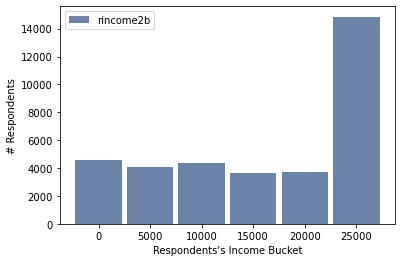

In [32]:
# Individual income in buckets
hist4c = thinkstats2.Hist(df.rincome2b, label='rincome2b')
thinkplot.Hist(hist4c)
thinkplot.Config(xlabel="Respondents's Income Bucket", ylabel='# Respondents')

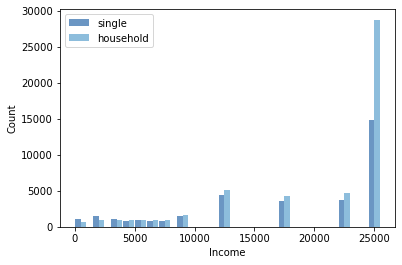

In [33]:
# Comparing individual income to household income
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(hist4, align='right', width=width, label="single")
thinkplot.Hist(hist4b, align='left', width=width, label="household")
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [34]:
# Comparing number of individual incomes vs number of household incomes
df['rincome2'].count(), df['income2'].count()

(35241, 50934)

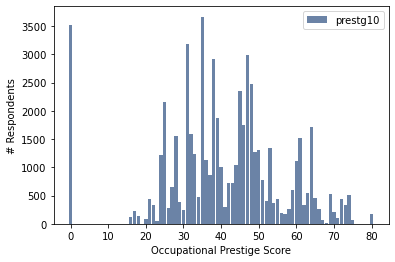

In [35]:
hist5 = thinkstats2.Hist(df.prestg10, label='prestg10')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Occupational Prestige Score', ylabel='# Respondents')

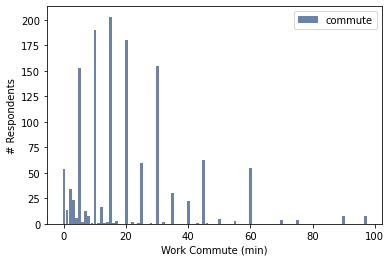

In [36]:
hist6 = thinkstats2.Hist(df.commute, label='commute')
thinkplot.Hist(hist6)
thinkplot.Config(xlabel='Work Commute (min)', ylabel='# Respondents')

In [37]:
# Determine a middle time to divide commute into groups
df.commute.median()

15.0

In [38]:
close = df[df.commute <= 15]
far = df[df.commute > 15]

close_hist = thinkstats2.Hist(close.rincome2, label='close')
far_hist = thinkstats2.Hist(far.rincome2, label='far')

In [39]:
# Are the groups roughly the same size?
len(close), len(far)

(721, 609)

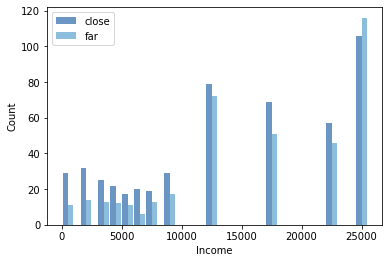

In [40]:
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(close_hist, align='right', width=width)
thinkplot.Hist(far_hist, align='left', width=width)
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

Note: Those in the highest income group tend to have a farther commute.

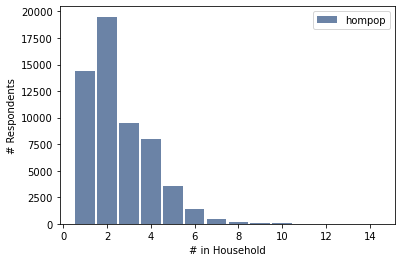

In [41]:
hist7 = thinkstats2.Hist(df.hompop, label='hompop')
thinkplot.Hist(hist7)
thinkplot.Config(xlabel='# in Household', ylabel='# Respondents')

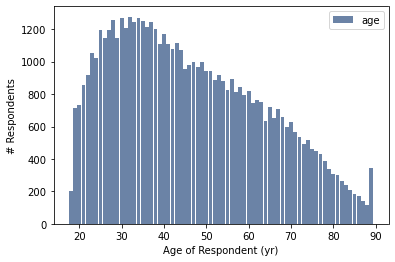

In [42]:
hist8 = thinkstats2.Hist(df.age, label='age')
thinkplot.Hist(hist8)
thinkplot.Config(xlabel='Age of Respondent (yr)', ylabel='# Respondents')

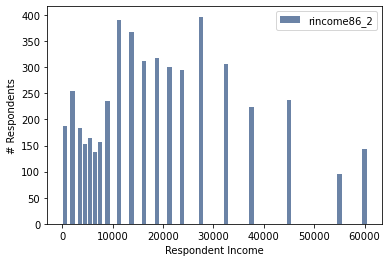

In [43]:
hist9 = thinkstats2.Hist(df.rincome86_2, label='rincome86_2')
thinkplot.Hist(hist9)
thinkplot.Config(xlabel='Respondent Income', ylabel='# Respondents')

In [44]:
# Determine middle income for dividing into groups
df.rincome86_2.median()

16250.0

In [45]:
incMore16k = df[df.rincome86_2 > 16250]
incLess16k = df[df.rincome86_2 <= 16250]

incMore16_hist = thinkstats2.Hist(incMore20k.granborn, label='>$16k Income')
incLess16_hist = thinkstats2.Hist(incLess20k.granborn, label='<$16k Income')

In [46]:
# Are the groups roughly the same size?
len(incMore16k), len(incLess16k)

(2315, 2544)

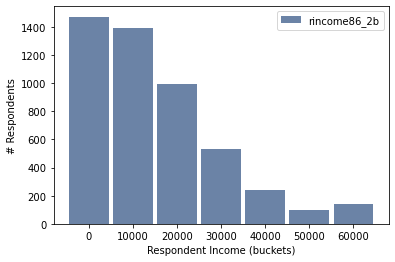

In [47]:
hist10 = thinkstats2.Hist(df.rincome86_2b, label='rincome86_2b')
thinkplot.Hist(hist10)
# plt.xticks(rotation=30)
thinkplot.Config(xlabel='Respondent Income (buckets)', ylabel='# Respondents')

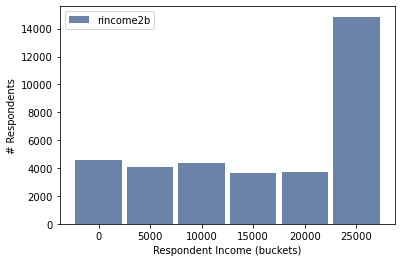

In [48]:
hist11 = thinkstats2.Hist(df.rincome2b, label='rincome2b')
thinkplot.Hist(hist11)
thinkplot.Config(xlabel='Respondent Income (buckets)', ylabel='# Respondents')

### Variable Charcteristics
#### Mean, Mode, Spread, & Tails
Include the other descriptive characteristics about the variables: Mean, Mode, Spread,  and Tails (Chapter 2). 

In [49]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN,5000.0,NaN
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN,5000.0,NaN
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN,NaN,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN,5000.0,NaN


In [50]:
# Determine the mode for each variable
df.mode(numeric_only=True)[0:1]

,year,hompop,granborn,age,commute,hrs1,id,prestg10,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,2006.0,2.0,0.0,32.0,15.0,40.0,1,35.0,25000.0,25000.0,27500.0,25000.0,0.0


In [51]:
# Determine the mean for each variable
round(df.mean(), 2)

year             1997.72
hompop              2.56
granborn            1.16
age                46.29
commute            20.25
hrs1               41.46
id               1196.87
prestg10           40.50
rincome2        17459.59
income2         19784.90
rincome86_2     19491.20
rincome2b       16031.89
rincome86_2b    14924.88
dtype: float64

In [52]:
# Determine the median for each variable
df.median()

year             1998.0
hompop              2.0
granborn            0.0
age                44.0
commute            15.0
hrs1               40.0
id               1060.0
prestg10           40.0
rincome2        22500.0
income2         25000.0
rincome86_2     16250.0
rincome2b       20000.0
rincome86_2b    10000.0
dtype: float64

In [53]:
# Determine the standadrd deviation for each variable
df.std()

year               11.790939
hompop              1.445464
granborn            1.609431
age                17.537180
commute            17.082472
hrs1               14.253505
id                852.797856
prestg10           16.316093
rincome2         8426.259155
income2          7449.806970
rincome86_2     14629.690814
rincome2b        9353.385261
rincome86_2b    14817.731510
dtype: float64

In [54]:
def SummaryStats(var):
    # Prints a list of summary stats for each variable
    minv = df[var].min()
    medv = df[var].median()
    maxv = df[var].max()
    meanv = round(df[var].mean(), 1)
    stdv = round(df[var].std(), 1)
    
    print("Variable:", var)
    print("\tMinimum:\t", minv)
    print("\tMedian:\t\t", medv)
    print("\tMaximum:\t", maxv)
    print("\tMean:\t\t", meanv)
    print("\tStd. Dev.\t", stdv)

In [55]:
statVars = ['year', 'hompop', 'granborn', 'age', 'hrs1', 'commute', 'prestg10', 
            'rincome2', 'income2', 'rincome86_2', 'rincome86_2b']

for item in statVars:
    SummaryStats(item)

Variable: year
	Minimum:	 1977
	Median:		 1998.0
	Maximum:	 2018
	Mean:		 1997.7
	Std. Dev.	 11.8
Variable: hompop
	Minimum:	 1.0
	Median:		 2.0
	Maximum:	 14.0
	Mean:		 2.6
	Std. Dev.	 1.4
Variable: granborn
	Minimum:	 0.0
	Median:		 0.0
	Maximum:	 4.0
	Mean:		 1.2
	Std. Dev.	 1.6
Variable: age
	Minimum:	 18.0
	Median:		 44.0
	Maximum:	 89.0
	Mean:		 46.3
	Std. Dev.	 17.5
Variable: hrs1
	Minimum:	 0.0
	Median:		 40.0
	Maximum:	 89.0
	Mean:		 41.5
	Std. Dev.	 14.3
Variable: commute
	Minimum:	 0.0
	Median:		 15.0
	Maximum:	 97.0
	Mean:		 20.2
	Std. Dev.	 17.1
Variable: prestg10
	Minimum:	 0
	Median:		 40.0
	Maximum:	 80
	Mean:		 40.5
	Std. Dev.	 16.3
Variable: rincome2
	Minimum:	 500.0
	Median:		 22500.0
	Maximum:	 25000.0
	Mean:		 17459.6
	Std. Dev.	 8426.3
Variable: income2
	Minimum:	 500.0
	Median:		 25000.0
	Maximum:	 25000.0
	Mean:		 19784.9
	Std. Dev.	 7449.8
Variable: rincome86_2
	Minimum:	 500.0
	Median:		 16250.0
	Maximum:	 60000.0
	Mean:		 19491.2
	Std. Dev.	 14629.7
Variable:

### PMF Comparison
#### Compare two scenarios in your data using a PMF
Using pg. 29 of your text as an example, compare two scenarios in your data using a  PMF. 

Reminder, this isn’t comparing two variables against each other – it is the same  variable, but a different scenario. Almost like a filter. 

The example in the book is first  babies compared to all other babies, it is still the same variable, but breaking the data  out based on criteria we are exploring (Chapter 3).

In [56]:
# Divide into low and high income groups
incMore20k = df[df.rincome2 >= 20000]
incLess20k = df[df.rincome2 <= 20000]

incMore_pmf = thinkstats2.Pmf(incMore20k.granborn, label='>$20k Income')
incLess_pmf = thinkstats2.Pmf(incLess20k.granborn, label='<$20k Income')

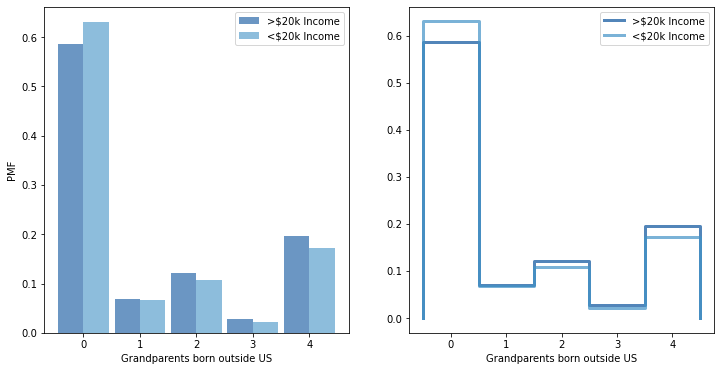

In [57]:
# Compare low and high income groups for each number of grandparents born outside US
width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(incMore_pmf, align='right', width=width)
thinkplot.Hist(incLess_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([incMore_pmf, incLess_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

In [58]:
# Divide into low and high occupational prestige score groups
hi_prestg = df[df.prestg10 >= 40]
lo_prestg = df[df.prestg10 < 40]

hi_prestg_pmf = thinkstats2.Pmf(hi_prestg.granborn, label='High Occupational Prestige')
lo_prestg_pmf = thinkstats2.Pmf(lo_prestg.granborn, label='Low Occupational Prestige')

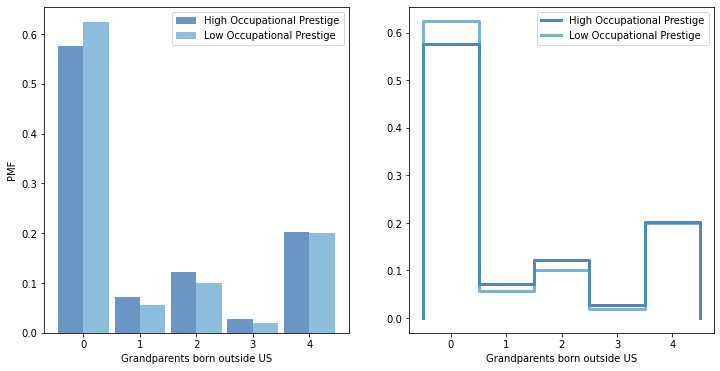

In [59]:
# Compare low and high occupational prestige for each number of grandparents born outside US
width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(hi_prestg_pmf, align='right', width=width)
thinkplot.Hist(lo_prestg_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([hi_prestg_pmf, lo_prestg_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

In [60]:
df.rincome86_2.median()

16250.0

In [61]:
# Divide into low and high income groups
incMore16k = df[df.rincome86_2 > 16250]
incLess16k = df[df.rincome86_2 <= 16250]

incMore16_pmf = thinkstats2.Pmf(incMore20k.granborn, label='> $16250 Income')
incLess16_pmf = thinkstats2.Pmf(incLess20k.granborn, label='<= $16250 Income')

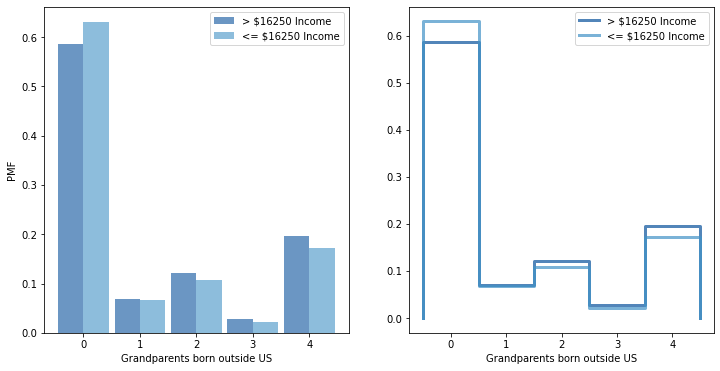

In [62]:
# Compare low and high income groups for each number of grandparents born outside US
width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(incMore16_pmf, align='right', width=width)
thinkplot.Hist(incLess16_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([incMore16_pmf, incLess16_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

### Create CDF
Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this  tell you about your variable and how does it address the question you are trying to  answer (Chapter 4). 

In [63]:
def MakeCDF(var):
    # Creates CDF of chosen variable
    cdf = thinkstats2.Cdf(df[var], label=var)
    thinkplot.Cdf(cdf)
    thinkplot.Show(xlabel=var, ylabel='CDF')

In [64]:
# Create list of variable for making CDFs
cdfVars = ['year', 'hompop', 'granborn', 'age', 'commute', 'hrs1', 'prestg10', 
           'rincome2', 'income2', 'rincome86_2', 'rincome86_2b']

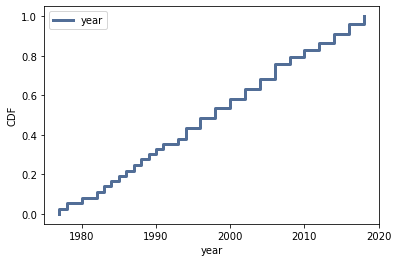

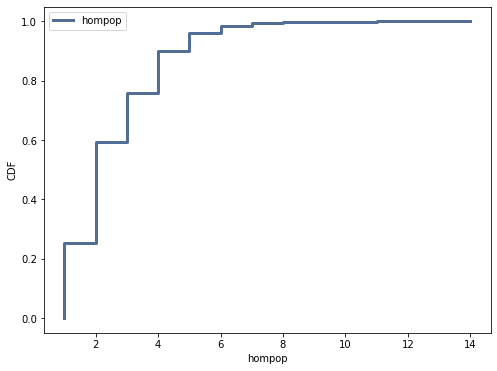

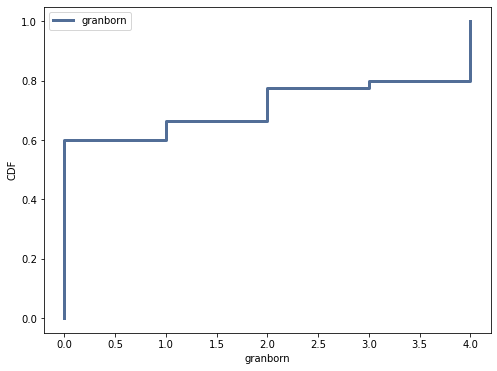

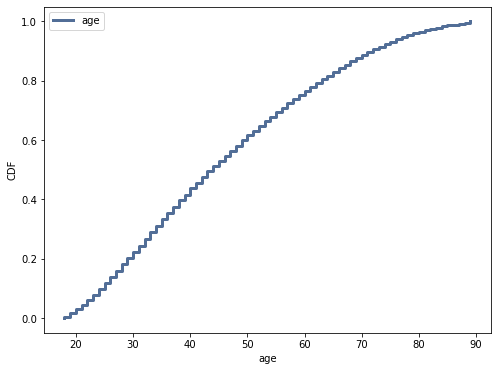

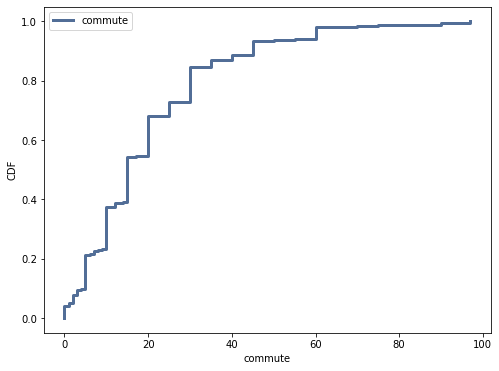

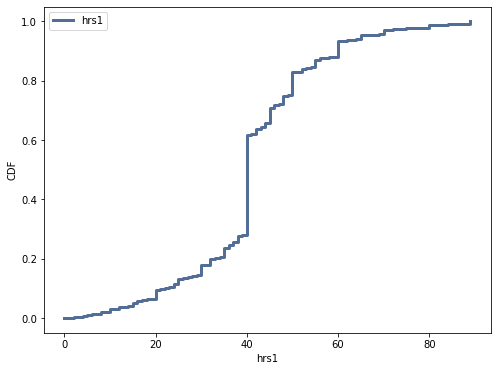

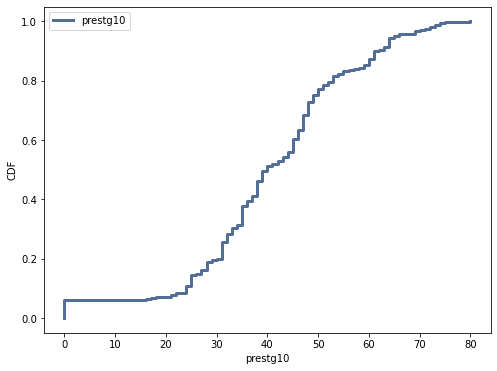

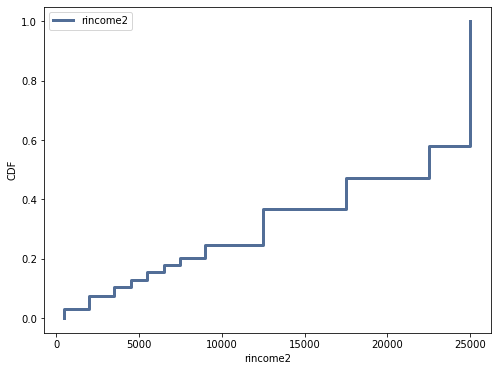

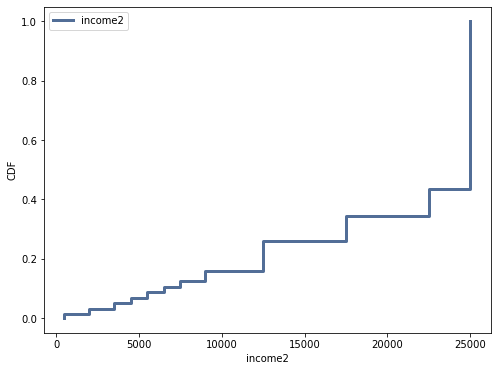

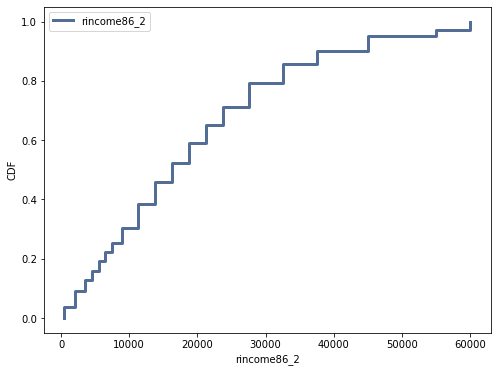

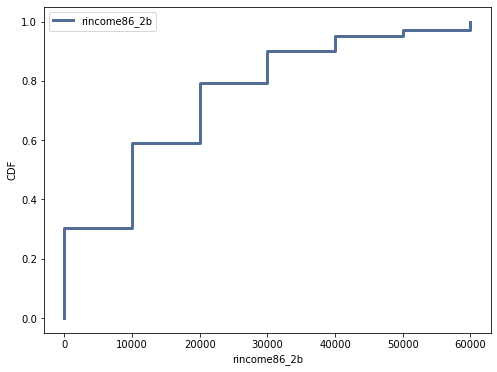

<Figure size 576x432 with 0 Axes>

In [65]:
for item in cdfVars:
    MakeCDF(item)

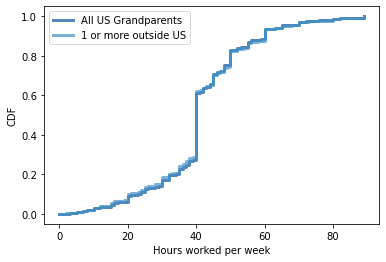

<Figure size 576x432 with 0 Axes>

In [66]:
# Compare CDFs of hours worked per week between those with all grandparents 
# born in the US and those with at least 1 grandparent born outside US.
granUS = df[df.granborn == 0]
granOut = df[df.granborn > 0]

granUS_cdf = thinkstats2.Cdf(granUS.hrs1, label='All US Grandparents')
granOut_cdf = thinkstats2.Cdf(granOut.hrs1, label='1 or more outside US')

thinkplot.PrePlot(2)
thinkplot.Cdfs([granUS_cdf, granOut_cdf])
thinkplot.Show(xlabel="Hours worked per week", ylabel="CDF")

### Analytical Distribution
Plot 1 analytical distribution and provide your analysis on how it applies to the dataset  you have chosen (Chapter 5). 

In [67]:
def MakeCCDF(var):
    # Creates a complimentary CDF for chosen variable
    cdf = thinkstats2.Cdf(df[var], label=var)
    thinkplot.Cdf(cdf, complement=True)
    thinkplot.Show(xlabel=var, ylabel='CCDF',
                  yscale='log', loc='upper right')

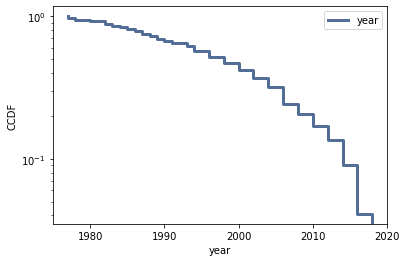

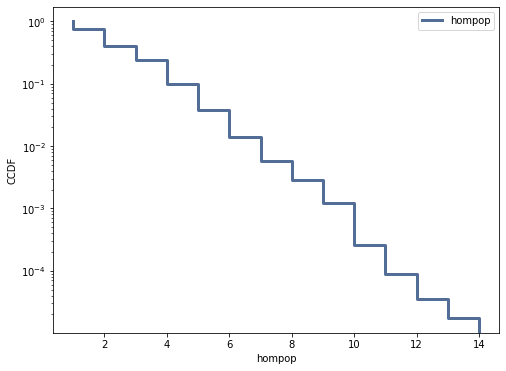

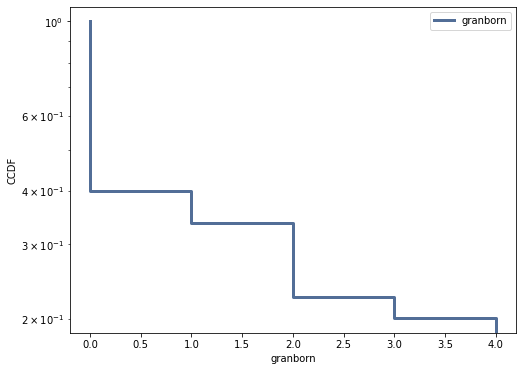

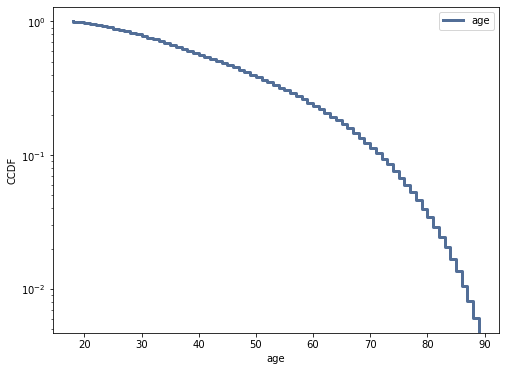

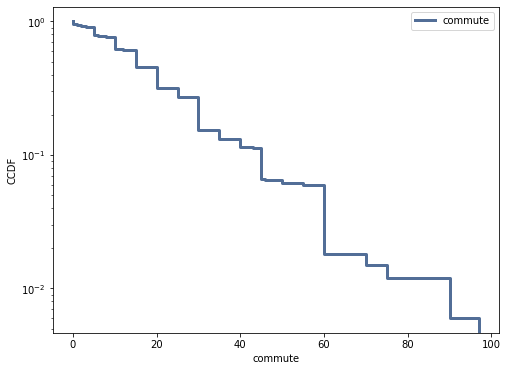

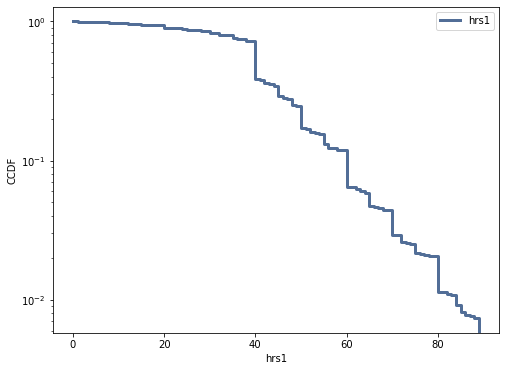

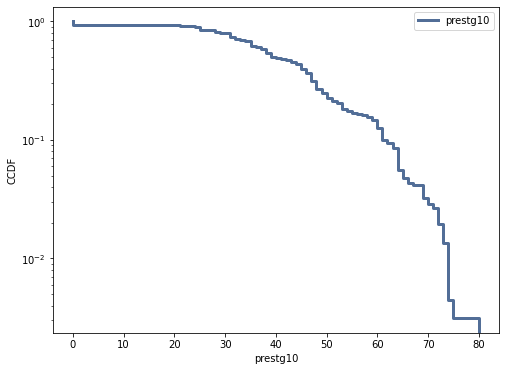

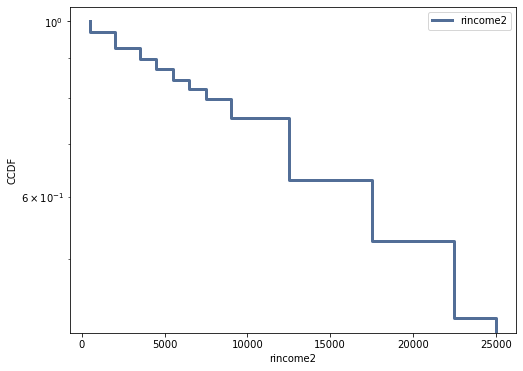

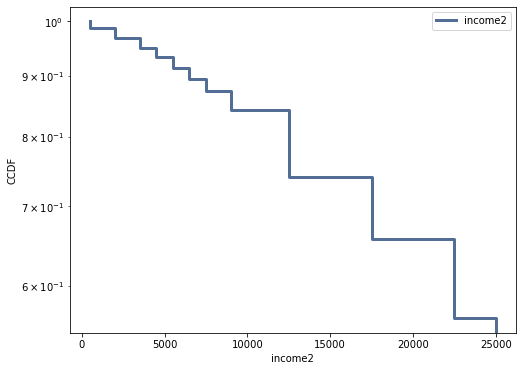

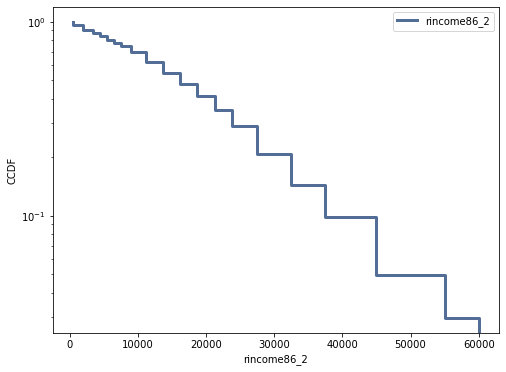

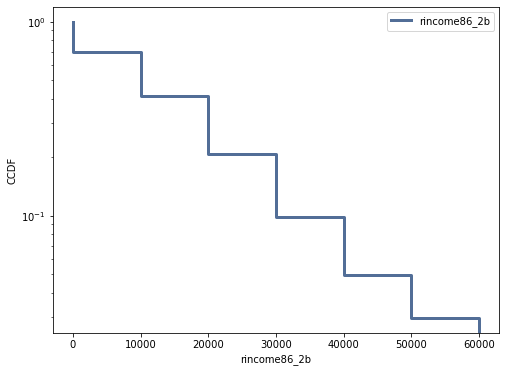

<Figure size 576x432 with 0 Axes>

In [68]:
for item in cdfVars:
    MakeCCDF(item)

Mean, Var 40.54900142653352 241.9623991455041
Sigma 15.555140601920128


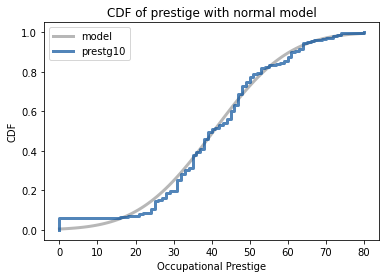

In [69]:
# Estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(df['prestg10'], p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=80)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df['prestg10'], label='prestg10')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='CDF of prestige with normal model',
                 xlabel='Occupational Prestige',
                 ylabel='CDF')

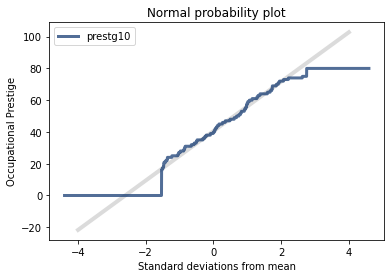

In [70]:
# Create a normal probability plot
mean, var = thinkstats2.TrimmedMeanVar(df['prestg10'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(df['prestg10'])
thinkplot.Plot(xs, ys, label='prestg10')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Occupational Prestige')

### Scatter Plots
Create two scatter plots comparing two variables and provide your analysis on  correlation and causation. 

In [71]:
# Create a cleaned data set by removing "nan's"
cleaned = df.dropna()

In [72]:
def Jitter(values, jitter=0.5):
    # Jitter function for scatter plots
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [73]:
# Apply jitter to variables
prestg10 = Jitter(cleaned.prestg10, 4)
rincome = Jitter(cleaned.rincome86_2, 4000)
age = Jitter(cleaned.age, 0.4)
commute = Jitter(cleaned.commute, 4)
granborn = Jitter(cleaned.granborn, 0.4)


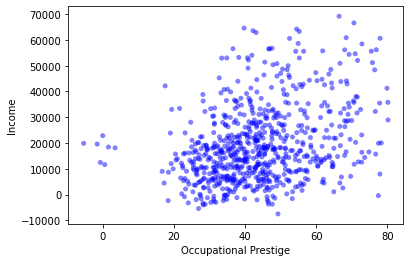

In [74]:
# Plot occupational prestige vs income
thinkplot.Scatter(prestg10, rincome, alpha=.5, s=25)
thinkplot.Config(xlabel='Occupational Prestige',
                 ylabel='Income',
                 legend=False)

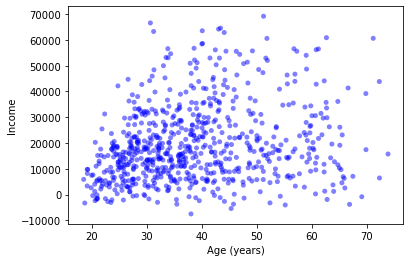

In [75]:
# Plot age vs income
thinkplot.Scatter(age, rincome, alpha=.5, s=25)
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Income',
                 legend=False)

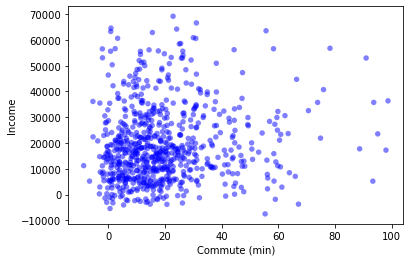

In [76]:
# Plot commute vs income
thinkplot.Scatter(commute, rincome, alpha=.5)
thinkplot.Config(xlabel='Commute (min)',
                 ylabel='Income',
                 legend=False)

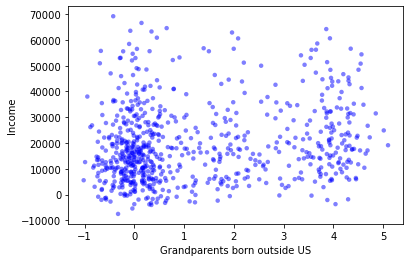

In [77]:
# Plot grandparents origin vs income
thinkplot.Scatter(granborn, rincome, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Income',
                 legend=False)

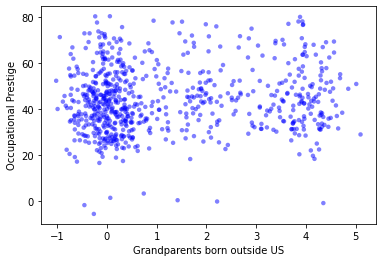

In [78]:
# Plot grandparents origin vs prestige
thinkplot.Scatter(granborn, prestg10, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Occupational Prestige',
                 legend=False)

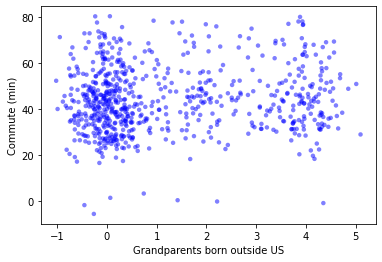

In [79]:
# Plot grandparents origin vs commute
thinkplot.Scatter(granborn, prestg10, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Commute (min)',
                 legend=False)

Remember, covariance, Pearson’s correlation, and Non Linear Relationships should also be considered during your analysis (Chapter 7). 

In [80]:
def Cov(xs, ys, meanx=None, meany=None):
    # Return covariance of variable pairs
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

##### Covariance

In [81]:
print("Income vs Occupational Prestige:") 
round(Cov(rincome, prestg10), 1)

Income vs Occupational Prestige:


68488.5

In [82]:
print("Income vs Age:")
round(Cov(rincome, age), 1)

Income vs Age:


38238.8

In [83]:
print("Income vs Commute:")
round(Cov(rincome, commute), 1)

Income vs Commute:


28058.1

In [84]:
print("Grandparent's origin vs Income")
round(Cov(granborn, rincome), 1)

Grandparent's origin vs Income


4245.8

In [85]:
print("Grandparent's origin vs Occupational Prestige:")
round(Cov(granborn, prestg10), 2)

Grandparent's origin vs Occupational Prestige:


2.12

In [86]:
print("Grandparent's origin vs Commute:")
round(Cov(granborn, commute), 2)

Grandparent's origin vs Commute:


2.17

##### Correlation

In [87]:
def Corr(xs, ys):
    # Return Correlation of variable pairs
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [88]:
print("Income vs Occupational Prestige:") 
round(Corr(rincome, prestg10), 3)

Income vs Occupational Prestige:


0.332

In [89]:
print("Income vs Age:")
round(Corr(rincome, age), 3)

Income vs Age:


0.216

In [90]:
print("Income vs Commute:")
round(Corr(rincome, commute), 3)

Income vs Commute:


0.111

In [91]:
print("Grandparent's origin vs Income")
round(Corr(granborn, rincome), 3)

Grandparent's origin vs Income


0.173

In [92]:
print("Grandparent's origin vs Occupational Prestige:")
round(Corr(granborn, prestg10), 3)

Grandparent's origin vs Occupational Prestige:


0.09

In [93]:
print("Grandparent's origin vs Commute:")
round(Corr(granborn, commute), 3)

Grandparent's origin vs Commute:


0.076

In [94]:
def SpearmanCorr(xs, ys):
    # Return Spearman's correlation for variable pairs
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [95]:
print("Income vs Occupational Prestige:") 
round(SpearmanCorr(rincome, prestg10), 3)

Income vs Occupational Prestige:


0.315

In [96]:
print("Income vs Age:")
round(SpearmanCorr(rincome, age), 3)

Income vs Age:


0.235

In [97]:
print("Income vs Commute:")
round(SpearmanCorr(rincome, commute), 3)

Income vs Commute:


0.12

In [98]:
print("Grandparent's origin vs Income")
round(SpearmanCorr(granborn, rincome), 3)

Grandparent's origin vs Income


0.168

In [99]:
print("Grandparent's origin vs Occupational Prestige:")
round(SpearmanCorr(granborn, prestg10), 3)

Grandparent's origin vs Occupational Prestige:


0.077

In [100]:
print("Grandparent's origin vs Commute:")
round(SpearmanCorr(granborn, commute), 3)

Grandparent's origin vs Commute:


0.088

### Test Hypothesis
Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [101]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Difference in income between all US born grandparents and at least 1 grandparent born outside US:

In [102]:
granUS = cleaned[cleaned.granborn == 0]
granOut = cleaned[cleaned.granborn >= 1]

data = granUS.rincome86_2.values, granOut.rincome86_2.values

p-value of < 1% is significant:

In [103]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Here's the distrubution of the test statistic (the difference in means) over many simulated samples:

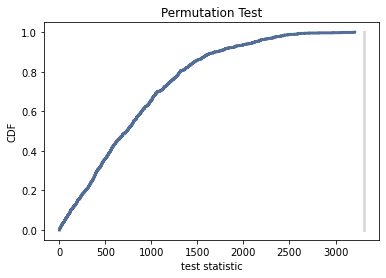

In [104]:
ht.PlotCdf()
thinkplot.Config(title='Permutation Test',
                 xlabel='test statistic',
                 ylabel='CDF')

In [105]:
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [106]:
ht = DiffStdPermute(data)
pvalue = ht.PValue()
pvalue

0.937

In [107]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [108]:
cleaned2 = df.dropna(subset=['granborn', 'rincome86_2'])
data2 = cleaned2.granborn.values, cleaned2.rincome86_2.values
ht = CorrelationPermute(data2)
pvalue = ht.PValue()
pvalue

0.0

In [109]:
ht.actual, ht.MaxTestStat()

(0.10842806946213936, 0.048996867993888346)

In [110]:
def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs

The false negative rate is 13%, which means that the power of the test is 87%.

In [111]:
neg_rate = FalseNegRate(data)
neg_rate

0.138

###  Regression Analysis
For this project, conduct a regression analysis on either one dependent and one  explanatory variable, or multiple explanatory variables (Chapter 10 & 11). 

In [112]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [113]:
granborn = cleaned.granborn
rincome = cleaned.rincome86_2

In [114]:
inter, slope = LeastSquares(granborn, rincome)
round(inter, 2), round(slope, 2)

(17955.31, 1351.37)

For each additional grandparent born outside the US, average income increases by ~$1,350.

In [115]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [116]:
fit_xs, fit_ys = FitLine(granborn, inter, slope)

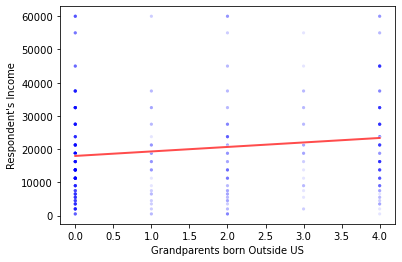

In [117]:
thinkplot.Scatter(granborn, rincome, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Grandparents born Outside US",
                 ylabel="Respondent's Income",
#                  axis=[10, 45, 0, 15],
                 legend=False)

In [118]:
import statsmodels.formula.api as smf

formula = 'rincome86_2 ~ granborn'
model = smf.ols(formula, data=cleaned)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rincome86_2   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     17.40
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           3.41e-05
Time:                        10:42:30   Log-Likelihood:                -7805.2
No. Observations:                 712   AIC:                         1.561e+04
Df Residuals:                     710   BIC:                         1.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.796e+04    662.253     27.112      0.000    1.67e+04    1.93e+04
granborn    1351.3672    323.982      4.171      0.000     715.290    1987.444
==============================================================================
Omnibus:                      104.229   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.497
Skew:                           1.045   Prob(JB):                     3.45e-33
Kurtosis:                       3.821   Cond. No.                         2.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The difference in income between those with any granparents born outside the US and those whose grandparents were all born within the US.

In [119]:
inter = results.params['Intercept']
slope = results.params['granborn']
print("Intercept:", round(inter, 2))
print("Slope:\t   ", round(slope, 2))

Intercept: 17955.31
Slope:	    1351.37


In [120]:
slope_pvalue = results.pvalues['granborn']
print("p-value of slope:", round(slope_pvalue, 7))

p-value of slope: 3.41e-05


In [121]:
print("R squared:", round(results.rsquared, 3))

R squared: 0.024


In [122]:
diff_income = granOut.rincome86_2.mean() - granUS.rincome86_2.mean()
print("Income difference:", round(diff_income, 2))

Income difference: 3306.85
